In [37]:
import numpy as np
import sklearn.preprocessing

x = np.array([0,1,2,3]).T
x = x.reshape(-1,1)
y = np.array([0,1,1,2]).T
y = y.reshape(-1,1)

step_size = 0.01

def gd(x, y, step_size, iterations, l):
    print("x", x.shape)
    print("y", y.shape)
    u = step_size
    l = l
    # Generating feature map for linear regression
    ones = np.ones((x.shape[0], 1))
    fm = np.hstack((x**2, x, ones))
    print('fm', fm.shape)
    
    iters = []
    MSE = []

    # Initializing weights
    w = np.array([0,0,1]).T
    w = w.reshape(-1,1)
    print('w', w.shape)

    # Gradient Descent
    for i in range(iterations):

        # Calculating loss
        tloss = (1/4) * ((((fm @ w) - y)**2) + l * np.linalg.norm(w, ord = 1))
        
        iters.append(i)
        MSE.append(tloss[0])
        
        # Calculating gradient
        tdloss = (1/2) * (fm.T @ (((fm @ w) - y)) + l * np.sign(w))

        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nLoss:\n\t ", tloss)
    print("\nGradient of Loss:\n\t ", tdloss)
    print("\nOptimal Weights:\n\t ", w)

    return w, iters, MSE, fm

# for i in range(100):
#     l = i*0.1
w, iters, MSE, fm = gd(x, y, 0.01, 400, 0.2)
    

x (4, 1)
y (4, 1)
fm (4, 3)
w (3, 1)


Loss:
	  [[0.06295037]
 [0.07522757]
 [0.03099934]
 [0.02844789]]

Gradient of Loss:
	  [[-0.00033509]
 [-0.04346416]
 [ 0.11101311]]

Optimal Weights:
	  [[0.17053859]
 [0.02483538]
 [0.37092196]]


<class 'list'> <class 'list'>
<class 'int'> <class 'numpy.ndarray'>


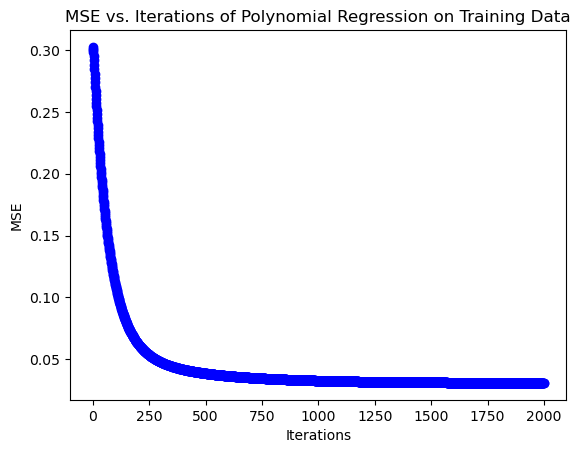

In [31]:
import matplotlib.pyplot as plt
plt.title("MSE vs. Iterations of Polynomial Regression on Training Data")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.scatter(x = iters, y= MSE, color='b')
plt.show()

In [43]:
x = np.genfromtxt('stock_prediction_data.csv', delimiter=',')
y = np.genfromtxt('stock_price.csv',delimiter = ',')
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(300, 10)
(300, 1)


In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

# Lasso
def gd(x, y, step_size, iterations, l):
    print("x", x.shape)
    print("y", y.shape)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    u = step_size
    
    
    poly = PolynomialFeatures(degree=2, include_bias=True)
    fm = poly.fit_transform(x)
    print('fm', fm.shape)
    
    iters = []
    MSE = []

    # Initializing weights
    w = np.random.randn(fm.shape[1], 1)
    print('w', w.shape)

    # Gradient Descent
    for i in range(iterations):

        # Calculating loss
        tloss = (1/4) * ((((fm @ w) - y)**2) + l * np.linalg.norm(w, ord = 1))
        
        iters.append(i)
        MSE.append(tloss[0])
        
        # Calculating gradient
        tdloss = (1/2) * (fm.T @ (((fm @ w) - y)) + l * np.sign(w))

        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nLoss:\n\t ", tloss)
    print("\nGradient of Loss:\n\t ", tdloss)
    print("\nOptimal Weights:\n\t ", w)

    return w, iters, MSE, fm

# for i in range(100):
#     l = i*0.1
w, iters, MSE, fm = gd(x, y, 0.0001, 20000, 0.2)
    

x (300, 10)
y (300, 1)
fm (300, 66)
w (66, 1)


Loss:
	  [[0.92002458]
 [0.92160848]
 [0.93181224]
 [0.92409721]
 [0.92750218]
 [0.94706666]
 [0.92505394]
 [0.95337115]
 [0.92278254]
 [0.94465958]
 [0.92121018]
 [0.93656402]
 [0.95414453]
 [0.92760035]
 [0.92662577]
 [0.92570401]
 [0.91904519]
 [0.92771941]
 [0.91994507]
 [0.91977539]
 [0.92079802]
 [0.93802179]
 [0.91948504]
 [0.91940681]
 [0.93784811]
 [0.92078416]
 [0.91965296]
 [0.94056539]
 [0.92465916]
 [0.9345901 ]
 [0.91882097]
 [0.91870987]
 [0.92393591]
 [0.97553473]
 [0.91861407]
 [0.93285647]
 [0.91929225]
 [0.93158629]
 [0.922441  ]
 [0.92087097]
 [0.9197091 ]
 [0.94184754]
 [0.92792804]
 [0.93794174]
 [0.91879322]
 [0.92459531]
 [0.93966284]
 [0.93502306]
 [0.91864154]
 [0.92172996]
 [0.92048961]
 [0.9399702 ]
 [0.91886349]
 [0.92336685]
 [0.91878467]
 [0.91983876]
 [0.91981905]
 [0.92991257]
 [0.92267876]
 [0.93467881]
 [0.92069453]
 [0.92174889]
 [0.92376358]
 [0.92442544]
 [0.92388237]
 [0.92350369]
 [0.92367296]
 [0.9

In [59]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

# Apply polynomial feature transformation
poly = PolynomialFeatures(degree=2, include_bias=True)
fm = poly.fit_transform(x_scaled)

# Train Lasso regression model
lasso = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso.fit(fm, y)

# Get predictions
y_pred = lasso.predict(fm)

# Get model coefficients
coefficients = lasso.coef_
intercept = lasso.intercept_

print("Lasso Coefficients:", coefficients)
print("Lasso Intercept:", intercept)


Lasso Coefficients: [ 0.00000000e+00 -8.59814048e-04  3.99723276e+00  5.11186040e-03
 -8.24771196e-03  9.90101042e-01  2.99818881e+00  3.99459616e+00
  2.98462491e+00  9.81871416e-01  1.01466747e+00 -1.43033000e-02
  8.85603440e-03  1.61793382e-02  1.07499457e-02  9.17953379e-03
 -4.90543458e-03  0.00000000e+00  0.00000000e+00  7.05232268e-03
 -1.01858239e-02  1.19238851e-02  7.21024233e-04  1.74670444e-02
  1.82199158e-03  2.96178719e-04 -1.72173208e-03  1.26403261e-02
  7.49013532e-03 -2.03163948e-02  0.00000000e+00 -5.33707993e-03
 -8.54562869e-03 -8.44459138e-03  4.08854270e-03  2.07972329e-02
  7.10694804e-03 -1.56728646e-02  1.59055815e-02 -1.41548411e-02
  2.97475505e-03  2.31747479e-03 -8.81745126e-05  6.34024436e-03
 -1.47595191e-02 -8.03601717e-03  4.79321900e-02 -2.58228216e-02
 -6.66247443e-03  0.00000000e+00 -0.00000000e+00  1.56848824e-02
 -1.52225127e-02 -2.14100684e-03  9.11994143e-03 -7.31295918e-03
 -5.16043111e-03 -6.59583505e-03  6.32777384e-03  7.62504412e-03
  1.8

In [60]:
# Lasso
def gd(x, y, step_size, iterations, l):
    print("x", x.shape)
    print("y", y.shape)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    u = step_size
    
    
    poly = PolynomialFeatures(degree=2, include_bias=True)
    fm = poly.fit_transform(x)
    print('fm', fm.shape)
    
    iters = []
    MSE = []

    # Initializing weights
    w = np.random.randn(fm.shape[1], 1)
    print('w', w.shape)

    # Gradient Descent
    for i in range(iterations):

        # Calculating loss
        tloss = (1/4) * ((((fm @ w) - y)**2) + l * np.linalg.norm(w, ord = 2))
        
        iters.append(i)
        MSE.append(tloss[0])
        
        # Calculating gradient
        tdloss = (1/2) * (fm.T @ (((fm @ w) - y)) + l * 2*w)

        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nLoss:\n\t ", tloss)
    print("\nGradient of Loss:\n\t ", tdloss)
    print("\nOptimal Weights:\n\t ", w)

    return w, iters, MSE, fm

# for i in range(100):
#     l = i*0.1
w, iters, MSE, fm = gd(x, y, 0.0001, 20000, 0.2)

x (300, 10)
y (300, 1)
fm (300, 66)
w (66, 1)


Loss:
	  [[0.36649817]
 [0.36888098]
 [0.3780235 ]
 [0.37156042]
 [0.37552882]
 [0.39521949]
 [0.37237806]
 [0.40088843]
 [0.3691419 ]
 [0.38953731]
 [0.36848045]
 [0.38398179]
 [0.39878542]
 [0.37284466]
 [0.37320236]
 [0.37126154]
 [0.3655434 ]
 [0.37450199]
 [0.36655423]
 [0.36688246]
 [0.36740137]
 [0.38735999]
 [0.36625939]
 [0.36610437]
 [0.38358942]
 [0.36735888]
 [0.36642588]
 [0.38638631]
 [0.37102446]
 [0.38056982]
 [0.36601027]
 [0.36540237]
 [0.37116775]
 [0.42267676]
 [0.36530156]
 [0.37894783]
 [0.36609768]
 [0.37624392]
 [0.36892276]
 [0.36677949]
 [0.36588216]
 [0.38618018]
 [0.37446556]
 [0.38349901]
 [0.36531327]
 [0.37160469]
 [0.38692292]
 [0.38286606]
 [0.3654551 ]
 [0.36809102]
 [0.3666295 ]
 [0.38414933]
 [0.36549467]
 [0.3691814 ]
 [0.36527557]
 [0.36624845]
 [0.36609252]
 [0.37568191]
 [0.36943256]
 [0.38210099]
 [0.36674139]
 [0.36834195]
 [0.37014938]
 [0.3712011 ]
 [0.37224825]
 [0.36917907]
 [0.36943608]
 [0.3

In [62]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

# Apply polynomial feature transformation
poly = PolynomialFeatures(degree=2, include_bias=True)
fm = poly.fit_transform(x_scaled)

# Train Lasso regression model
lasso = Ridge()  # Alpha is the regularization strength
lasso.fit(fm, y)

# Get predictions
y_pred = lasso.predict(fm)

# Get model coefficients
coefficients = lasso.coef_
intercept = lasso.intercept_

print("Ridge Coefficients:", coefficients)
print("Ridge Intercept:", intercept)

Ridge Coefficients: [[ 0.00000000e+00 -1.84692375e-03  3.98179130e+00  4.96917085e-03
  -9.77775303e-03  9.87870313e-01  2.98720844e+00  3.98051594e+00
   2.97314252e+00  9.78484978e-01  1.01469623e+00 -1.77752931e-02
   1.31162523e-02  1.52209078e-02  1.43695425e-02  1.05863704e-02
  -1.00670394e-02  2.17568164e-04  1.20960336e-03  7.17463870e-03
  -1.01626515e-02  1.02401414e-02  2.47212317e-03  1.52279218e-02
   2.65842873e-03  5.54498964e-04 -1.48703058e-03  1.23900580e-02
   8.87984738e-03 -1.89339938e-02  2.82821540e-03 -6.32696458e-03
  -1.07271091e-02 -1.08617333e-02  4.44857824e-03  2.29435862e-02
   4.31300291e-03 -1.96719822e-02  2.11976724e-02 -1.39032390e-02
   3.73895244e-03  7.03962944e-03 -3.71209228e-03  7.39584637e-03
  -1.76653217e-02 -1.00231543e-02  5.09218823e-02 -2.56237143e-02
  -6.43198926e-03 -1.14026281e-03 -3.33261595e-03  1.84518742e-02
  -1.76541425e-02 -7.78520795e-03  1.14238668e-02 -6.29059584e-03
  -8.89519218e-03 -7.36240793e-03  7.50620182e-03  1.117